<h2>Libraries</h2>

In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

<h2>Reading and visualising the data</h2>



          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


<AxesSubplot:xlabel='wt', ylabel='mpg'>

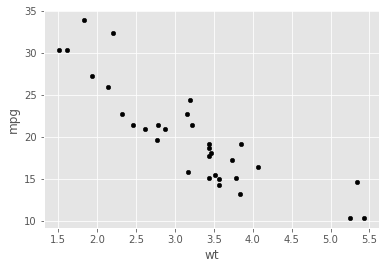

In [35]:
mtcars = pd.read_csv('mtcars.csv')
print(mtcars.head())
mtcars.plot(kind='scatter',x='wt',y='mpg',color='black') #mileage vs weight

<h2>Linear Regression (Univariate)</h2>

In [36]:
from sklearn import linear_model

In [37]:
#model initializing
reg = linear_model.LinearRegression()

#training the model
reg.fit(X = pd.DataFrame(mtcars['wt']),y =mtcars['mpg'] )
print('intercept:',reg.intercept_)
print('slope:',reg.coef_)

intercept: 37.28512616734204
slope: [-5.34447157]


In [38]:
reg.score(X = pd.DataFrame(mtcars['wt']),y =mtcars['mpg']) #R-score

0.7528327936582646

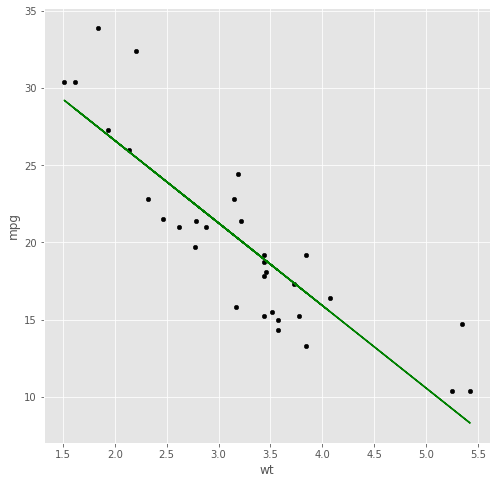

In [40]:
pred = reg.predict(X = pd.DataFrame(mtcars['wt'])) #predicted data

#original data plot 
mtcars.plot(kind='scatter',x='wt',y='mpg',color='black',figsize=(8,8))

#predicted data plot after training
plt.plot(mtcars['wt'],pred,color = 'g')




<h2>polynomial regression</h2>

In [48]:
poly = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly.coef_)

# Check R-squared
poly.score(X = predictors, 
                 y = mtcars["mpg"])



Model intercept
-14921.120803412003
Model Coefficients
[ 6.45813549e+04 -1.20086129e+05  1.26931927e+05 -8.46598448e+04
  3.73155197e+04 -1.10334755e+04  2.16590404e+03 -2.70730544e+02
  1.94974162e+01 -6.15515436e-01]


0.8702106604949409

C:\Users\naram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


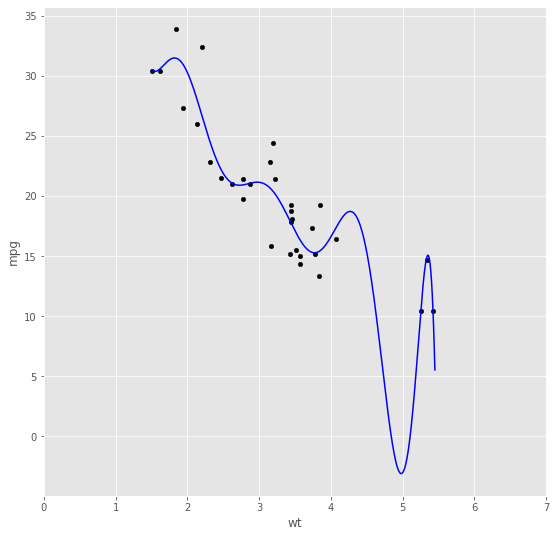

In [49]:
p_range = np.arange(1.5, 5.45, 0.001)

poly_predX = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  


#predicted values
y_val = poly.predict(X = poly_predX)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# predicted curve
plt.plot(p_range,   # X-axis range
         y_val,          # Predicted values
         color="blue");